In [2]:
import scipy as sp
from scipy import constants
from func import load_csv_columns
import numpy as np


In [3]:
bits = load_csv_columns("../PS01/data_03.csv", 6)
seconds = load_csv_columns("../PS01/data_03.csv", 4)
print(bits[1])
print(seconds)


# convert bit to float
bits = [float(i) for i in bits]
# convert seconds to float
seconds_float = [float(i) for i in seconds]

41
['5e-06', '0.250702', '0.500762', '0.751786', '1.00169', '1.252689', '1.502693', '1.753547', '2.00369', '2.254364', '2.504603', '2.755288', '3.005564', '3.256173', '3.506512', '3.757023', '4.00744', '4.25808', '4.508484', '4.759206', '5.009383', '5.260254', '5.510557', '5.761095', '6.011471', '6.261845', '6.512373', '6.762353', '7.013304', '7.263296', '7.514456', '7.764504', '8.015393', '8.265818', '8.516545', '8.766959', '9.017493', '9.268034', '9.518277', '9.769074', '10.019275', '10.270114', '10.520239', '10.771047', '11.021252', '11.27195', '11.522102', '11.772941', '12.022953', '12.274087', '12.524008', '12.774965', '13.02506', '13.275832', '13.526189', '13.77687', '14.027239', '14.277987', '14.528125', '14.779089', '15.029156', '15.280121', '15.530191', '15.781026', '16.031247', '16.281975', '16.532343', '16.782997', '17.033427', '17.284163', '17.534501', '17.785201', '18.035492', '18.286246', '18.536475', '18.787216', '19.037474', '19.288295', '19.538564', '19.78921', '20.039

In [4]:
# Calculate transform to Newton

bit_calib = 1205 # bits
weight_calib = 0.9995 # kg
g = constants.g
force_calib = weight_calib * g

# Newton pro bit

newton_per_bit = force_calib / bit_calib
print(newton_per_bit)

0.008134229605809128


In [5]:
# Calculate force

force = []

for i in range(len(bits)):
    force.append(bits[i] * newton_per_bit)  # Newton


print(force)

[0.39044302107883816, 0.3335034138381743, 0.39044302107883816, 0.6100672204356846, 0.30096649541493775, 0.17895305132780082, 0.30910072502074687, 0.317234954626556, 0.36604033226141075, 0.35790610265560163, 0.36604033226141075, 0.30910072502074687, 0.3985772506846473, 0.317234954626556, 0.3497718730497925, 0.6100672204356846, 3.408242204834025, 6.271491026078838, 9.004592173630705, 12.819545858755186, 15.479438939854772, 18.529775042033194, 18.92021806311203, 19.188647640103735, 19.473345676307055, 19.41640606906639, 19.636030268423237, 19.627896038817426, 19.652298727634854, 19.749909482904563, 19.936996763838174, 19.920728304626554, 19.920728304626554, 20.034607519107883, 20.083412896742736, 20.197292111224066, 20.229829029647302, 20.473855917821577, 20.43318476979253, 20.498258606639002, 20.61213782112033, 20.555198213879667, 20.628406280331948, 20.660943198755184, 20.79109087244813, 20.82362779087137, 20.856164709294607, 20.961909694170124, 20.945641234958504, 21.10019159746888, 21

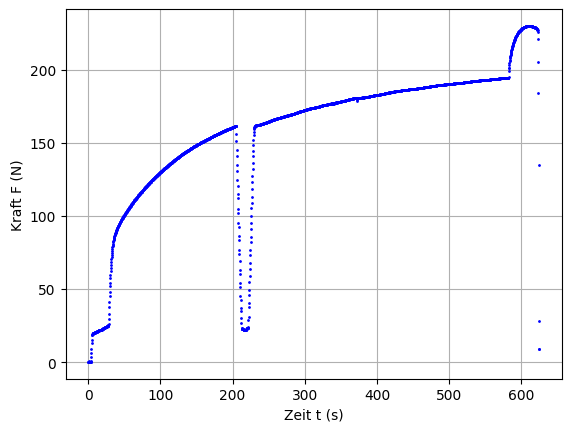

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

# Plot force over time in a scatter plot small dots

plt.plot(seconds_float, force, label="Force" , color="blue" , marker="o", linestyle="None", markersize=1)
plt.xlabel("Zeit t (s)")
plt.ylabel("Kraft F (N)")
plt.grid()
# Set x-axis ticks to show only 10s steps
plt.xticks(np.arange(0, max(seconds_float), 100))
# smaller dots

#ax = plt.gca()
## Große Striche (Major Ticks) festlegen
#ax.xaxis.set_major_locator(MultipleLocator(50))
#ax.yaxis.set_major_locator(MultipleLocator(20))
#
## Kleine Striche (Minor Ticks) hinzufügen (z.B. 5 kleine Striche pro großem Intervall)
#ax.xaxis.set_minor_locator(AutoMinorLocator(10))
#ax.yaxis.set_minor_locator(AutoMinorLocator(5))
#
## Minor Ticks sichtbar machen
#ax.tick_params(axis='both', which='minor', length=5)
#
#plt.grid(which='major', linestyle='-', linewidth=0.75)
#plt.grid(which='minor', linestyle=':', linewidth=0.5)


plt.show()


In [7]:
# Kraft in Spannung umrechnen

durchmesser_probe = 1.992e-3  # m (already in meters)

# Berechnung des Querschnitts der Probe (Kreisfläche)
querschnitt = np.pi * (durchmesser_probe/2)**2  # m²

v = 0.5  # mm/min

# V in SI umrechnen
v_si = 8.3333e-6  # m/s

# L_0 and L_0_SI are already defined in previous cells, no need to redefine

L_0_SI = 0.10335  # m

# Berechnung der Spannung (in Pascal oder N/m²)
spannung = []
for i in range(len(force)):
    spannung.append(force[i] / querschnitt)  # Pa

# Zeit in Dehnung umrechnen
dehnung = []
for i in range(len(seconds_float)):
    dehnung.append(seconds_float[i] * v_si / L_0_SI)  # dimensionslos

print(f"Querschnitt: {querschnitt:.4e} m²")
print(f"Dehnrate: {v_si/L_0_SI:.4e} 1/s")
print(f"Spannung: {spannung}")
print(f"Dehnung: {dehnung}")

Querschnitt: 3.1165e-06 m²
Dehnrate: 8.0632e-05 1/s
Spannung: [125282.12609560773, 107011.81603999827, 125282.12609560773, 195753.32202438707, 96571.6388653643, 57420.97446048687, 99181.68315902278, 101791.72745268127, 117451.99321463224, 114841.94892097374, 117451.99321463224, 99181.68315902278, 127892.17038926622, 101791.72745268127, 112231.90462731525, 195753.32202438707, 1093608.5590429092, 2012344.150410699, 2889319.033079953, 4113429.8068057867, 4966914.290832114, 5945680.90095405, 6070963.027049657, 6157094.488740388, 6248446.039018435, 6230175.728962827, 6300646.924891606, 6298036.880597946, 6305867.013478922, 6337187.545002824, 6397218.56375697, 6391998.475169652, 6391998.475169652, 6428539.095280872, 6444199.361042822, 6480739.981154041, 6491180.158328675, 6569481.487138431, 6556431.2656701375, 6577311.620019405, 6613852.240130625, 6595581.930075015, 6619072.328717941, 6629512.505892575, 6671273.214591111, 6681713.391765746, 6692153.56894038, 6726084.1447579395, 6720864.05617

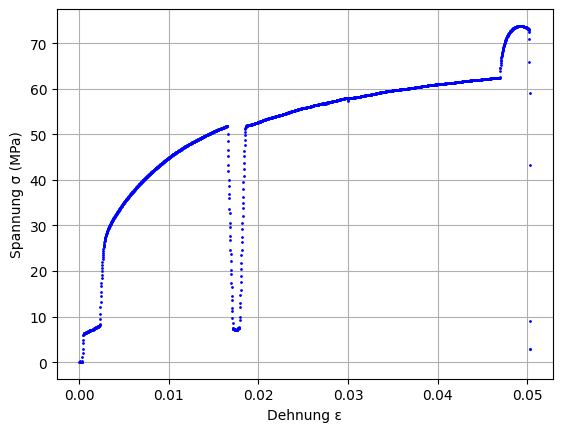

In [8]:
#Spannung in MPa umrechnen
spannung = [i/1e6 for i in spannung]

## plot spannung über dehnung in MPa
plt.plot(dehnung, spannung, label="Spannung über Dehnung", color="blue", marker="o", linestyle="None", markersize=1)
plt.xlabel("Dehnung ε")
plt.ylabel("Spannung σ (MPa)")

# Set y axis to MPa 

plt.grid()
plt.show()



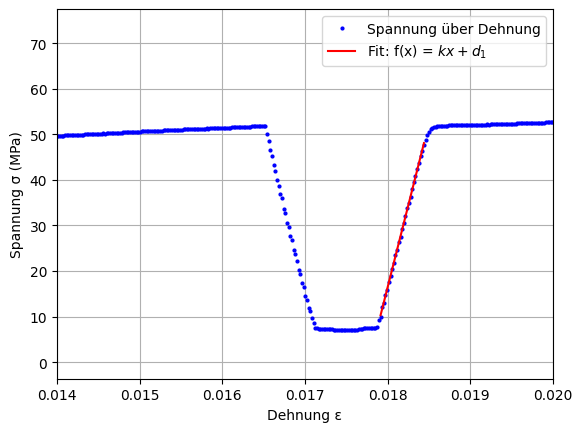

Steigung: 71928.9551 MPa
y-Achsenabschnitt: -1278.3232 MPa
R^2: 0.9997


In [9]:
# Plot spannungs dehtung dirgram von 0.015 bis0 0.02
plt.plot(dehnung, spannung, label="Spannung über Dehnung", color="blue", marker="o", linestyle="None", markersize=2)
plt.xlabel("Dehnung ε")
plt.ylabel("Spannung σ (MPa)")
plt.xlim(0.014, 0.02)

# Fit linear function in the range of 0.0179 to 0.0184
# Filter data points within the range
mask = np.logical_and(np.array(dehnung) >= 0.0179, np.array(dehnung) <= 0.01845)
x_range = np.array(dehnung)[mask]
y_range = np.array(spannung)[mask]

# Perform linear fit on filtered data
m, b = np.polyfit(x_range, y_range, 1)
plt.plot(x_range, m*x_range + b, label=f"Fit: f(x) = $kx+d_1$", color="red")
plt.legend()



plt.grid()
plt.show()

print(f"Steigung: {m:.4f} MPa")
print(f"y-Achsenabschnitt: {b:.4f} MPa")
# R^2
y_mean = np.mean(y_range)
SS_tot = np.sum((y_range - y_mean)**2)
SS_res = np.sum((y_range - (m*x_range + b))**2)
R_squared = 1 - SS_res/SS_tot
print(f"R^2: {R_squared:.4f}")



Steigung (E-Modul): 3327 MPa
y-Achsenabschnitt: 18.71 MPa
R^2: 0.9922


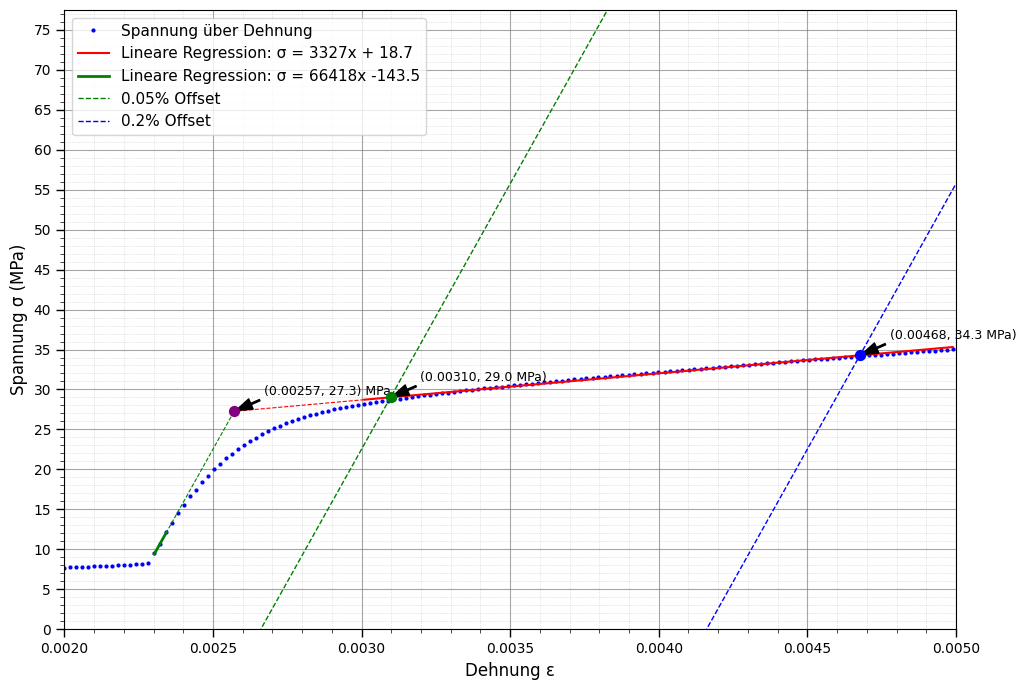

In [31]:
from scipy.interpolate import interp1d
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

# plot dehnung von 0.002 bis 0.007
plt.figure(figsize=(10, 7))  # Larger figure size for better readability
plt.plot(dehnung, spannung, label="Spannung über Dehnung", color="blue", marker="o", linestyle="None", markersize=2)
plt.xlabel("Dehnung ε", fontsize=12)
plt.ylabel("Spannung σ (MPa)", fontsize=12)
plt.xlim(0.002, 0.005)
plt.ylim(0, None)
ax = plt.gca()
# Große Striche (Major Ticks) festlegen
ax.xaxis.set_major_locator(MultipleLocator(0.0005))  # Feinere Hauptunterteilung
ax.yaxis.set_major_locator(MultipleLocator(5))      # Feinere Hauptunterteilung

# Kleine Striche (Minor Ticks) hinzufügen
ax.xaxis.set_minor_locator(AutoMinorLocator(5))    
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Ticks sichtbarer machen
ax.tick_params(axis='both', which='major', length=6, width=1.0, labelsize=10)
ax.tick_params(axis='both', which='minor', length=3, width=0.5)

# Gitter verbessern
plt.grid(which='major', linestyle='-', linewidth=0.8, alpha=0.7, color='gray')
plt.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.4, color='gray')

plt.legend(fontsize=11)
plt.tight_layout()


# Linear plot fit from 0.0036 to 0.0045 first fit
# Filter data points within the range
mask = np.logical_and(np.array(dehnung) >= 0.0030, np.array(dehnung) <= 0.005)
x_range = np.array(dehnung)[mask]
y_range = np.array(spannung)[mask]

# Perform linear fit on filtered data
m, b = np.polyfit(x_range, y_range, 1)

# Plot the linear fit
plt.plot(x_range, m*x_range + b, label=f"Lineare Regression: σ = {m:.0f}x + {b:.1f}", color="red", linewidth=1.5)

# Linear plot fit from 0.0025 to 0.0026
mask = np.logical_and(np.array(dehnung) >= 0.0023, np.array(dehnung) <= 0.00235)
x_range_2 = np.array(dehnung)[mask]
y_range_2 = np.array(spannung)[mask]
# Perform linear fit on filtered data
m2, b2 = np.polyfit(x_range_2, y_range_2, 1)

# Plot the linear fit
plt.plot(x_range_2, m2*x_range_2 + b2, label=f"Lineare Regression: σ = {m2:.0f}x {b2:.1f}", color="green", linewidth=2)

# Find intersection point of the two lines
# Solve m1*x + b1 = m2*x + b2
x_intersect = (b2 - b)/float(m - m2)
y_intersect = m*x_intersect + b

# Mark the intersection point
plt.scatter(x_intersect, y_intersect, color='purple', s=50, zorder=5)
plt.annotate(f'({x_intersect:.5f}, {y_intersect:.1f}) MPa', 
             xy=(x_intersect, y_intersect), xytext=(x_intersect+0.0001, y_intersect+2),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=9)

# Draw lines from the fit lines to the intersection point
plt.plot([x_range[0], x_intersect], [m*x_range[0] + b, y_intersect], 'r--', linewidth=0.8)
plt.plot([x_range_2[0], x_intersect], [m2*x_range_2[0] + b2, y_intersect], 'g--', linewidth=0.8)


# Calculate 0.05% offset yield strength
strain_offset = 0.0005  # 0.05% offset
x_offset = x_intersect + strain_offset

# Create points for the 0.05% offset line
x_offset_line_005 = np.linspace(0.002, 0.005, 100)
y_offset_line_005 = m2 * (x_offset_line_005 - strain_offset) + b2

# Plot the 0.05% offset line
plt.plot(x_offset_line_005, y_offset_line_005, 'g--', linewidth=1, label="0.05% Offset")
# Get m3 and b3 for the 0.05% offset line
m3, b3 = np.polyfit(x_offset_line_005, y_offset_line_005, 1)

# calculate intersection with first line
x_intersect_005 = (b3 - b)/float(m - m3)
y_intersect_005 = m*x_intersect_005 + b

# Mark the intersection point for 0.05% offset
plt.scatter(x_intersect_005, y_intersect_005, color='green', s=50, zorder=5)
plt.annotate(f'({x_intersect_005:.5f}, {y_intersect_005:.1f} MPa)', 
             xy=(x_intersect_005, y_intersect_005), xytext=(x_intersect_005+0.0001, y_intersect_005+2),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=9)

# Calculate 0.2% offset yield strength
strain_offset = 0.002  # 0.2% offset
x_offset_02 = x_intersect + strain_offset

# Create points for the 0.2% offset line
x_offset_line_02 = np.linspace(0.002, 0.005, 100)
y_offset_line_02 = m2 * (x_offset_line_02 - strain_offset) + b2

# Plot the 0.2% offset line
plt.plot(x_offset_line_02, y_offset_line_02, 'b--', linewidth=1, label="0.2% Offset")
# Get m4 and b4 for the 0.2% offset line
m4, b4 = np.polyfit(x_offset_line_02, y_offset_line_02, 1)
# calculate intersection with first line
x_intersect_02 = (b4 - b)/float(m - m4)
y_intersect_02 = m*x_intersect_02 + b
# Mark the intersection point for 0.2% offset
plt.scatter(x_intersect_02, y_intersect_02, color='blue', s=50, zorder=5)
plt.annotate(f'({x_intersect_02:.5f}, {y_intersect_02:.1f} MPa)', 
             xy=(x_intersect_02, y_intersect_02), xytext=(x_intersect_02+0.0001, y_intersect_02+2),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=9)





# Calculate R² fro fit 1 and 2 and plot in legend
# R^2 for fit 1
y_mean = np.mean(y_range)
SS_tot = np.sum((y_range - y_mean)**2)
SS_res = np.sum((y_range - (m*x_range + b))**2)
R_squared = 1 - SS_res/SS_tot
# R^2 for fit 2
y_mean = np.mean(y_range_2)
SS_tot = np.sum((y_range_2 - y_mean)**2)
SS_res = np.sum((y_range_2 - (m2*x_range_2 + b2))**2)
R_squared_2 = 1 - SS_res/SS_tot


plt.legend(fontsize=11)

print(f"Steigung (E-Modul): {m:.0f} MPa")
print(f"y-Achsenabschnitt: {b:.2f} MPa")
print(f"R^2: {R_squared:.4f}")

plt.show()